# 2차 분류 모델_클래스 분류

# RNN 모델링

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from eunjeon import Mecab
import re
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils

In [2]:
edata = pd.read_csv('./e_data.csv', encoding='utf-8')

In [3]:
len(set(list(edata["id"])))

130

In [4]:
x=edata['contents']
y=edata['id']
print(y)

0         39
1         39
2         39
3         23
4         14
        ... 
10294    121
10295     25
10296     25
10297     80
10298     80
Name: id, Length: 10299, dtype: int64


In [13]:
tagger = Mecab()
morph_tokenized_sentences = [tagger.morphs(s.replace(' ', '')) for s in x]

In [14]:
temp=[]
for j in range(len(morph_tokenized_sentences)):
    for document in morph_tokenized_sentences[j]:
        temp.append(re.sub(r'[^ ㄱ-ㅣ가-힣A-Za-z]', '', document)) #특수기호 제거, 정규 표현식    
    morph_tokenized_sentences[j] = temp
    temp=[]

In [16]:
stopwords = [""]
f = open('./불용어사전.txt',encoding='UTF8')
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()
token=[]
for w in morph_tokenized_sentences:
    temp_X=[]
    temp_X =w

    temp_X = [t for t in temp_X if not t in stopwords]
    token.append(temp_X)

[['어서',
  '세요',
  '코디',
  '봇',
  '도와드릴까요',
  '처음',
  '대학교',
  '들어가',
  '는',
  '옷',
  '코디',
  '해',
  '세요',
  '신입',
  '생',
  '코디',
  '어울리',
  '게',
  '화사',
  '스웨터',
  '추천',
  '해',
  '드릴게요',
  '옷',
  '어울리',
  '는',
  '치마',
  '추천',
  '해',
  '세요',
  '고객',
  '님',
  '키',
  '사이즈',
  '맞추',
  '옷',
  '도',
  '어울리',
  '실',
  '은',
  '어떠신가요',
  '키',
  '작',
  '아서',
  '짧',
  '은',
  '치마',
  '추천',
  '해',
  '세요',
  '색상',
  '도',
  '매칭',
  '어울리',
  '는',
  '짧',
  '은',
  '치마',
  '어두운',
  '계열',
  '은',
  '나요',
  '언밸런스',
  '컷팅',
  '세련미',
  '돋보이',
  '게',
  '는',
  '치마',
  '인데',
  '마음',
  '드',
  '시',
  '나요',
  '나쁘',
  '네요',
  '외투',
  '도',
  '추천',
  '해',
  '시',
  '겠',
  '어요',
  '요즘',
  '계절',
  '는',
  '가디건',
  '자켓',
  '걸치',
  '기',
  '은데',
  '특정',
  '종류',
  '는',
  '게',
  '으신',
  '트렌치코트',
  '종류',
  '추천',
  '해',
  '세요',
  '이너',
  '색상',
  '무난',
  '게',
  '어울릴',
  '트렌치코트',
  '신발',
  '도',
  '추천',
  '해',
  '세요',
  '운동',
  '화',
  '구두',
  '걸',
  '선호',
  '시',
  '나요',
  '운동',
  '화',
  '추천',
  '해',
  '세요',
  '스타일',
  '도',
  '무난',
 

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token)

In [19]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5883
등장 빈도가 2번 이하인 희귀 단어의 수: 2114
단어 집합에서 희귀 단어의 비율: 35.93404725480197
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.17847737624767007


In [20]:
vocab_size = total_cnt - rare_cnt + 1 # tokenizer 함수에 들어 갈 때 영향줘서 1 추가 해야 됨
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3770


In [21]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(token)
X_data = tokenizer.texts_to_sequences(token)

문장 최대 길이 : 361
문장의 평균 길이 : 137.99194096514225


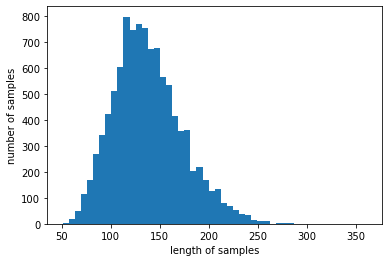

In [112]:
import matplotlib.pyplot as plt
print('문장 최대 길이 :',max(len(l) for l in X_data))
print('문장의 평균 길이 :',sum(map(len, X_data))/len(X_data))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
plt.close()

In [22]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 250
below_threshold_len(max_len, X_data)

전체 샘플 중 길이가 250 이하인 샘플의 비율: 96.0675793766385


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_data = pad_sequences(X_data, maxlen = max_len)
enc = LabelEncoder()
enc.fit(y)
Y_label = enc.transform(y)
y_data = tf.keras.utils.to_categorical(Y_label)

In [24]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.3, random_state=777, stratify=y_data)
x_train.shape

(7209, 250)

In [26]:
import numpy as np
y_train = np.array(y_train)
y_test = np.array(y_test)

In [34]:
model = Sequential()
model.add(Embedding(vocab_size, max_len))
model.add(SimpleRNN(40))
model.add(Dense(130, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 250)         942500    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 40)                11640     
_________________________________________________________________
dense_3 (Dense)              (None, 130)               5330      
Total params: 959,470
Trainable params: 959,470
Non-trainable params: 0
_________________________________________________________________


In [36]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('sec_categorical_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=32, validation_split=0.2)

loaded_model = load_model('sec_categorical_best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/10
181/181 [==============================] - 22s 110ms/step - loss: 2.4499 - acc: 0.9267 - val_loss: 1.0905 - val_acc: 0.9889

Epoch 00001: val_acc improved from -inf to 0.98890, saving model to sec_categorical_best_model.h5
Epoch 2/10
181/181 [==============================] - 19s 105ms/step - loss: 0.6468 - acc: 0.9908 - val_loss: 0.4437 - val_acc: 0.9931

Epoch 00002: val_acc improved from 0.98890 to 0.99307, saving model to sec_categorical_best_model.h5
Epoch 3/10
181/181 [==============================] - 19s 105ms/step - loss: 0.2686 - acc: 0.9962 - val_loss: 0.2012 - val_acc: 0.9965

Epoch 00003: val_acc improved from 0.99307 to 0.99653, saving model to sec_categorical_best_model.h5
Epoch 4/10
181/181 [==============================] - 19s 105ms/step - loss: 0.1348 - acc: 0.9979 - val_loss: 0.1137 - val_acc: 0.9979

Epoch 00004: val_acc improved from 0.99653 to 0.99792, saving model to sec_categorical_best_model.h5
Epoch 5/10
181/181 [==============================] - 1

In [40]:
loaded_model = load_model('sec_categorical_best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

97/97 [==============================] - 3s 27ms/step - loss: 0.0319 - acc: 0.9997

 테스트 정확도: 0.9997


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


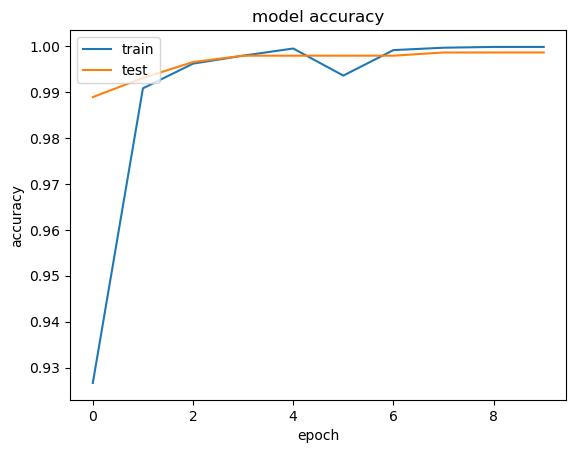

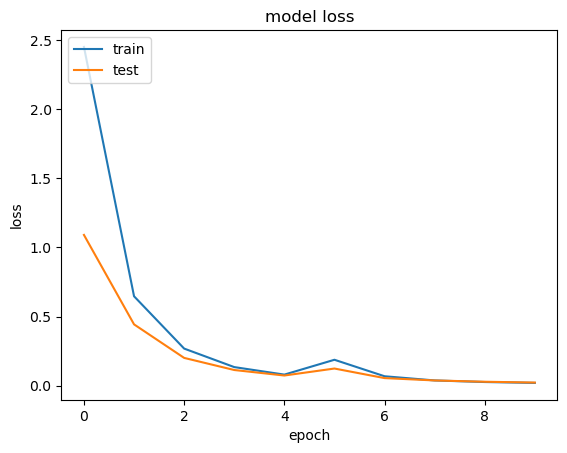

In [39]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()